In [1]:
import ragas

print(ragas.__version__)

0.2.2.dev9+g8efe80d


In [2]:
import os

os.environ["OPENAI_API_KEY"] = "your_apikey"


In [3]:
from langchain_openai import ChatOpenAI 

llm = ChatOpenAI(
    model="gpt-4o-mini"
    )

In [4]:
from langchain_openai import OpenAIEmbeddings

embeddingModel = OpenAIEmbeddings(
    model="text-embedding-3-small",
    # With the `text-embedding-3` class
    # of models, you can specify the size
    # of the embeddings you want returned.
    # dimensions=1536 #
)

In [5]:
from langchain.document_loaders import DirectoryLoader

# 載入資料夾中所有TXT檔案
loader = DirectoryLoader('./', glob='**/*.txt')

# 將資料轉成document物佚，每個檔案會為作為一個document
docs = loader.load()
 
docs 

The MIME type of '消費者保護法.txt' is "cannot open `\\346\\266\\210\\350\\262\\273\\350\\200\\205\\344\\277\\235\\350\\255\\267\\346\\263\\225.txt' (illegal byte sequence)". This file type is not currently supported in unstructured.
The MIME type of '消費者保護細則.txt' is "cannot open `\\346\\266\\210\\350\\262\\273\\350\\200\\205\\344\\277\\235\\350\\255\\267\\347\\264\\260\\345\\211\\207.txt' (illegal byte sequence)". This file type is not currently supported in unstructured.


[Document(page_content='Q:001.消費者保護法何時公布施行？\n\nA:現行消費者保護法係立法院依據行政院於七十七年間函送的『消費者保護法草案』，與趙立法委員少康等六十六人，會同財團法人中華民國消費者文教基金會等民間團體所擬定的『消費者保護法草案』，二種草案版本作為審查討論基 礎，歷經五年的討論審查後，在八十三年一月十一日三讀通過並送請總統於同日公布施行。該法依中央法規標準法規定，應自八十三年一月十三日起發生效力。其後該法並於九十二年一月二十二日經總統公布修正若干條文，依中央法規標準法規定，修正條文應自九十二年一月二十四日起發生效力；九十四年二月五日經總統公布增訂第二十二條之一條文，依中央法規標準法規定，自九十四年二月七日起發生效力；另一百零四年六月十七日經總統公布修正若干條\n\n文，依本法第六十四條規定，本次修正公布之第二條第十款與第十一款及第十\n\n八條至第十九條之二之施行日期，由行政院定之外，依中央法規標準法規定，自一百零四年六月十九日起發生效力。\n\nQ:002.消費者保護法施行細則何時發布施行？\n\nA:消費者保護法自八十三年一月十一日公布施行後，行政院即依該法第六十三條「本法施行細則，由行政院定之。」之規定，積極研訂工作。行政院於八十三年 十一月二日發布施行，該細則依中央法規標準法規定，應自八十三年十一月四日起發生效力。其後歷經九十二年與一零四年兩次修正，最近修正於一零四年十二月三十一日經行政院發布修正若干條文，依中央法規標準法規定，修正條文應自一零五年一月二日起發生效力。\n\nQ:003.消費者保護法之立法目的為何？ A:消費者保護法之立法目的主要有二：\n\n（一）保障消費者權益：消費者保護法第一條第一項即明定本法之立法意旨\n\n為：『保護消費者權益，促進國民消費生活安全，提昇國民消費生活品質。』其目的就是要使消費者權益能夠獲得有效保障。\n\n（二）促進企業良性發展：消費者保護法之立法目的，除了在保障消費者權益外，事實上也具有社會政策與經濟政策的使命。未來，由於消費者保護法之落實執行，將不但使消費者應有權益能獲得合理保障，也能帶動商品與服務品質的提昇，促進企業良性發展。\n\nQ:004.消費者保護法與其他法令關係如何？\n\nA:關於消費者保護法與其他法令之關係，消費者保護法第一條第二項已經明文規定為『有關消

In [6]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=600, chunk_overlap=100)
splits = text_splitter.split_documents(docs)

In [7]:
from langchain_chroma import Chroma
vectorstore = Chroma.from_documents(documents=splits, embedding=embeddingModel )

In [8]:
retriever = vectorstore.as_retriever()

In [9]:
from langchain import hub
prompt = hub.pull("rlm/rag-prompt")


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)



c:\Users\qwe11\anaconda3\envs\RagAS\Lib\site-packages\langchain\hub.py:86: DeprecationWarning: The `langchainhub sdk` is deprecated.
Please use the `langsmith sdk` instead:
  pip install langsmith
Use the `pull_prompt` method.
  res_dict = client.pull_repo(owner_repo_commit)


In [10]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

# rag_chain.invoke("消費者保護法第七條所規定之責任是否為『無過失責任』？")

In [11]:
from datasets import Dataset
 
questions = ["為預防消費糾紛,保護消費者權益,中央主管機關得選擇特定行業,擬訂其定型化契約應記載或不得記載事項,報請行政院核定後公告,下列敘述何者錯誤?(A)公告不得記載之事項,經記載於定型化契約,仍構成契約之內容(B)違反公告之定型化契約,其定型化契約條款無效(C)公告應記載之事項,雖未記載於定型化契約,仍構成契約之內容(D)企業經營者使用定型化契約者,主管機關得隨時派員查核", 
             "依消費者保護法規定,下列關於企業經營者提供商品之敘述,何者正確?(A)對於有危害消費者財產之虞的商品,僅負於明顯處為警告標示之義務(B)對於第三人的損害賠償責任,得預先約定免除(C)對於消費者的損害賠償責任,得預先約定限制(D)對於有事實足認有危害消費者安全與健康之虞的商品,應即回收",
             "依消費者保護法規定,企業經營者以定型化契約條款使消費者拋棄消費者審閱之合理期間,其契約條款之效力如何?(A)消費者不得主張該條款仍構成契約之內容(B)其條款不構成契約之內容(C)由行政院消費者保護處審定(D)由目的事業主管機關得撤銷",
             "依消費者保護法規定,下列有關消費者保護團體之敘述,何者錯誤?(A)消費者保護團體以社團法人或財團法人為限(B)以保護消費者權益、推行消費者教育為宗旨(C)消費者保護刊物之編印發行為其任務之一(D)以確保公平競爭、促進經濟之安定與繁榮為宗旨",
             "依消費者保護法規定關於商品標示,下列敘述何者錯誤?(A)企業經營者應依商品標示法等法令為商品之標示(B)輸入之商品,應附中文標示及說明書(C)輸入之商品,所附中文標示及說明書,其內容得就原產地之標示及說明,簡略摘要之(D)輸入之商品或服務在原產地附有警告標示者,應附中文標示及說明書,其內容不得較原產地之標示及說明書簡略",
             "依消費者保護法規定,企業經營者所出具之書面保證書其應載明事項,下列何者錯誤?(A)交易日期(B)製造商之資本額(C)保證之內容(D)製造商之名稱、地址",
             "依消費者保護法規定,下列有關消費者保護團體從事檢驗之敘述,何者錯誤?(A)得委託設有與檢驗項目有關之檢驗設備之機關、團體檢驗(B)檢驗結果有錯誤時,應主動對外更正(C)發表檢驗結果後,通知相關企業經營者,得不公布其檢驗方法及經過(D)為從事商品或服務檢驗,應設置與檢驗項目有關之檢驗設備",
             "依消費者保護法規定,有關消費關係之定義,下列敘述何者正確?(A)指消費者與消費者間就商品所發生之法律關係(B)指企業經營者與企業就商品製作所發生之法律關係(C)指企業經營者與企業經營者間就商品所發生之法律關係(D)指消費者與企業經營者間就商品或服務所發生之法律關係",
             "依消費者保護法規定,下列關於定型化契約條款之敘述,何者錯誤?(A)定型化契約條款未經記載於定型化契約中而依正常情形顯非消費者所得預見者,該條款不構成契約之內容(B)契約中之定型化契約條款牴觸個別磋商條款之約定者,其牴觸部分無效(C)定型化契約中之定型化契約條款,不構成契約內容之一部者,除去該部分,該契約之其他部分,仍為有效(D)定型化契約中之定型化契約條款,一部無效,該契約全部無效",
             "依消費者保護法規定,提供之商品或服務具有危害消費者健康、財產之可能者,下列何者應於明顯處為警告標示及緊急處理危險之方法?(A)企業經營者(B)目的事業主管機關(C)行政院消費者保護處(D)消費者"
            ]
ground_truths = [["公告不得記載之事項,經記載於定型化契約"],
                ["對於有事實足認有危害消費者安全與健康之虞的商品,應即回收"],
                 ["其條款不構成契約之內容"],
                 ["以確保公平競爭、促進經濟之安定與繁榮為宗旨"],
                 ["輸入之商品,所附中文標示及說明書,其內容得就原產地之標示及說明,簡略摘要之"],
                 ["製造商之資本額"],
                 ["發表檢驗結果後,通知相關企業經營者,得不公布其檢驗方法及經過"],
                 ["指企業經營者與企業經營者間就商品所發生之法律關係"],
                 ["定型化契約中之定型化契約條款,一部無效,該契約全部無效"],
                ["企業經營者"]]
answers = [
    [
        """在針對消費者權益保護及消費糾紛預防的相關問題中，對於選項的正確性分析如下：
        錯誤的敘述
        選項(A)的敘述是錯誤的。根據消費者保護法的規定，公告不得記載之事項，即使被記載於定型化契約中，仍不構成契約的內容，這意味著這些事項不具法律效力 
        正確的敘述
        選項(B)：違反公告之定型化契約，其條款將被視為無效，這是為了保護消費者的權益 
        選項(C)：公告應記載之事項，即使未記載於定型化契約中，仍然構成契約的內容，這是為了確保消費者的知情權 
        選項(D)：主管機關有權隨時派員查核企業經營者使用的定型化契約，以確保其遵守相關法律規定 
        總結
        因此，根據上述分析，選項(A)是錯誤的，而選項(B)、(C)和(D)均為正確的敘述。這些規定的存在旨在加強對消費者的保護，確保契約的合法性和合規性，並促進市場的公平交易。"""
    ],[
       """
        根據消費者保護法的相關規定，以下是對於企業經營者提供商品的正確敘述分析：
        正確的敘述
        (D) 對於有事實足認有危害消費者安全與健康之虞的商品，應即回收。
        根據消費者保護法，企業經營者對於有可能危害消費者安全與健康的商品，應立即進行回收，以保障消費者的權益和安全 
        錯誤的敘述
        (A) 對於有危害消費者財產之虞的商品，僅負於明顯處為警告標示之義務。
        這一說法不正確，因為企業經營者對於有危害消費者財產的商品，應承擔更全面的責任，而不僅僅是在明顯處進行警告標示 
        (B) 對於第三人的損害賠償責任，得預先約定免除。
        這一說法也是錯誤的，企業經營者不得預先約定免除對第三人的損害賠償責任，這是為了保護消費者的權益 
        (C) 對於消費者的損害賠償責任，得預先約定限制。
        同樣地，這一說法不正確，企業經營者不得預先約定限制對消費者的損害賠償責任，以確保消費者在受到損害時能夠獲得充分的賠償
        總結
        綜合以上分析，正確的選項是(D)，而(A)、(B)、(C)均為錯誤的敘述。企業經營者在提供商品時，必須遵循消費者保護法的規定，以確保消費者的安全和權益。
       """
    ],[
        """
        根據消費者保護法的相關規定，企業經營者若以定型化契約條款使消費者放棄合理的審閱期間，該條款的效力將受到質疑。消費者有權主張該條款不構成契約的內容，因為這樣的條款可能被視為不公平或不合理，並且不符合消費者保護法所強調的公平和透明的契約條款 
        具體而言，消費者保護法強調消費者的權益，若企業的行為違反法律規定，則相關的契約條款可能會被視為無效，消費者有權要求撤銷這些條款，因此，根據上述分析，正確的選項應為(B)其條款不構成契約之內容。
        總結來說，企業經營者若使消費者放棄合理的審閱期間，該條款的法律效力將受到挑戰，消費者可主張該條款不具法律效力，這是為了保護消費者的權益，確保他們在簽署合約前有足夠的時間進行審閱和理解 
        """
    ],[
        """
        根據消費者保護法的規定，消費者保護團體的主要任務是保護消費者權益和推行消費者教育，而不包括以確保公平競爭、促進經濟的安定與繁榮為宗旨。因此，選項(D)的敘述是錯誤的
        消費者保護團體的宗旨與任務
        1. 宗旨: 消費者保護團體的宗旨主要是保護消費者的權益和推行消費者教育，這一點在多個報告中均有明確指出
        2. 任務: 此外，消費者保護團體的任務之一確實包括編印和發行消費者保護刊物，這表明消費者保護團體在提供資訊和教育方面的積極角色。
        3. 組織形式: 消費者保護團體的組織形式可以是社團法人或財團法人，這也是正確的敘述 
        結論
        綜合以上分析，選項(D)的敘述是錯誤的，因為消費者保護團體的宗旨並不包括確保公平競爭或促進經濟的安定與繁榮。這一點對於理解消費者保護團體的功能和目的至關重要。
        """
    ],[
        """
        根據消費者保護法的規定，對於商品標示的要求，以下是各項敘述的正確性分析：
        正確的敘述
        1. (A) 企業經營者應依商品標示法等法令為商品之標示。這一敘述是正確的，因為企業經營者確實有責任遵循相關法律進行商品標示 

        2. (B) 輸入之商品應附中文標示及說明書。這一敘述也是正確的，根據消費者保護法，所有輸入商品必須附有中文標示及說明書
        3. (C) 輸入之商品所附中文標示及說明書的內容可以就原產地的標示及說明進行簡略摘要。這一敘述同樣正確，符合消費者保護法的規定 
        錯誤的敘述
        4. (D) 輸入之商品或服務在原產地附有警告標示者，應附中文標示及說明書，其內容不得較原產地之標示及說明書簡略。這一敘述是錯誤的，因為根據法律規定，附有警告標示的商品仍然可以進行內容的簡略摘要
        總結
        因此，根據上述分析，選項(D)是錯誤的敘述。所有輸入商品必須遵循消費者保護法的要求，並且在標示及說明書的內容上，企業經營者應確保符合相關法律的規定。
        """
    ],[
        """
        根據消費者保護法的規定，企業經營者所出具的書面保證書必須包含特定的資訊，以保障消費者的權益。這些必須載明的事項包括：
        1. 交易日期 - 這是消費者在購買商品或服務時的重要參考信息。
        2. 保證之內容 - 這部分應詳細說明保證的範圍和條件。
        3. 製造商之名稱和地址** - 消費者需要知道產品的來源，以便在需要時能夠聯繫製造商。
        然而，根據分析，製造商的資本額並不是必須載明的事項。因此，選項(B)「製造商之資本額」是錯誤的，因為它不符合消費者保護法的要求。
        總結來說，根據消費者保護法，正確的必須載明事項包括交易日期、保證內容以及製造商的名稱和地址，而製造商的資本額則不在必須載明的範疇內 
        """
    ],[
        """
        根據消費者保護法的規定，對於消費者保護團體從事檢驗的相關敘述，選項(C)是錯誤的。具體來說，選項(C)提到在發表檢驗結果後，通知相關企業經營者時可以不公布檢驗方法及經過，這可能違反透明度的要求。消費者保護團體應該在發表檢驗結果時，提供完整的檢驗過程，以維護公信力和透明度 [Data: Reports (1, 2, 3)]。
        其他選項的正確性如下：
        選項(A)：消費者保護團體可以委託具備相關檢驗設備的機關或團體進行檢驗，這是符合規定的，因此是正確的
        選項(B)：若檢驗結果有錯誤，消費者保護團體應主動對外更正，這符合消費者保護的原則，因此也是正確的
        選項(D)：消費者保護團體在進行檢驗時，應設置與檢驗項目有關的檢驗設備，這是正確的要求 
        """
    ],[
        """
        根據消費者保護法的規定，消費關係的正確定義是指消費者與企業經營者間就商品或服務所發生之法律關係。這一點強調了消費者在市場中的權利和企業的責任，旨在保障消費者的權益，確保他們能夠獲得公平的交易和保護 。
        因此，正確的選項是(D)指消費者與企業經營者間就商品或服務所發生之法律關係。
        """
    ],[
        """
        根據消費者保護法的規定，對於定型化契約條款的敘述中，以下幾點可作為分析：
        錯誤的敘述
        1. 選項(A)：定型化契約條款未經記載於定型化契約中且依正常情形顯非消費者所得預見者，該條款不構成契約之內容。這一敘述是正確的，因此(A)是錯誤的。
        2. 選項(D)：定型化契約中之定型化契約條款若一部無效，該契約全部無效的說法是錯誤的。根據法律，只有無效的部分會被剔除，其他部分仍然有效，因此(D)也是錯誤的。
        正確的敘述
        1. 選項(B)：契約中之定型化契約條款若牴觸個別磋商條款之約定者，其牴觸部分無效，這是正確的敘述，因此(B)是正確的。
        2. 選項(C)：定型化契約中之定型化契約條款不構成契約內容之一部者，除去該部分，該契約之其他部分仍為有效，這也是正確的敘述，因此(C)是正確的。
        總結
        綜合以上分析，選項(A)和(D)均為錯誤的敘述，而選項(B)和(C)則為正確的敘述。這些結論基於消費者保護法的相關規定，確保消費者在面對定型化契約時的權益受到保護。
        """
    ],[
        """
        根據消費者保護法的規定，企業經營者（A）應於明顯處為警告標示及緊急處理危險之方法，以保護消費者的健康和財產安全。這一法律責任強調了企業在提供商品或服務時，必須確保消費者獲得必要的安全資訊，以降低潛在的風 險 。
        此外，目的事業主管機關和行政院消費者保護處的角色主要是監督和執行消費者保護法，確保企業遵守相關的警告標示和緊急處理措施的要求。然而，具體的警告標示責任仍然在於企業經 營者。
        總結來說，根據消費者保護法，企業經營者是負有主要責任的主體，必須在其產品或服務上提供必要的警告標示和應急處理方法，以保障消費者的安全。
        """
    ]
]
contexts = []

for query in questions:
    # 使用 retriever 获取相关文档
    docs = retriever.get_relevant_documents(query)
    # 提取文档内容
    context = [doc.page_content for doc in docs]
    # 将上下文添加到列表
    contexts.append(context)

# 将答案和标准答案列表中的内容合并为字符串
answers = ["\n".join(ans) if isinstance(ans, list) else ans for ans in answers]
ground_truths = [" ".join(gt) if isinstance(gt, list) else gt for gt in ground_truths]

# 准备数据字典
data = {
    "question": questions,
    "answer": answers,
    "ground_truth": ground_truths,
    "retrieved_contexts": contexts,
}

# 将数据字典转换为数据集
dataset = Dataset.from_dict(data)

c:\Users\qwe11\anaconda3\envs\RagAS\Lib\site-packages\langchain_core\_api\deprecation.py:119: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


In [12]:
# from ragas.metrics._faithfulness import faithfulness
# from ragas.metrics._answer_relevancy import answer_relevancy
# from ragas.vancemetrics._answer_rele


In [13]:
#openai的结果
import os
from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    context_recall,
    context_precision,
)

 
result = evaluate(
    dataset = dataset, 
    metrics=[
        context_precision,
        context_recall,
        faithfulness,
        answer_relevancy,
    ],
)
 
# df = result.to_pandas()
# df

Evaluating:   0%|          | 0/40 [00:00<?, ?it/s]

D:\RAGAS\ragas\src\ragas\metrics\base.py:281: DeprecationWarning: The function _single_turn_ascore was deprecated in 0.2, and will be removed in the 0.3 release. Use LLMContextRecall instead.
  self._single_turn_ascore(sample=sample, callbacks=group_cm),
D:\RAGAS\ragas\src\ragas\metrics\base.py:281: DeprecationWarning: The function _single_turn_ascore was deprecated in 0.2, and will be removed in the 0.3 release. Use LLMContextRecall instead.
  self._single_turn_ascore(sample=sample, callbacks=group_cm),
D:\RAGAS\ragas\src\ragas\metrics\base.py:281: DeprecationWarning: The function _single_turn_ascore was deprecated in 0.2, and will be removed in the 0.3 release. Use LLMContextRecall instead.
  self._single_turn_ascore(sample=sample, callbacks=group_cm),
D:\RAGAS\ragas\src\ragas\metrics\_context_precision.py:147: DeprecationWarning: The function _ascore was deprecated in 0.2, and will be removed in the 0.3 release. Use LLMContextPrecisionWithReference instead.
  return await self._asco

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

 
df = result.to_pandas()
df

# 創建一個 DataFrame
# df = pd.DataFrame(data)
# df

,user_input,retrieved_contexts,response,reference,context_precision,context_recall,faithfulness,answer_relevancy
0,"為預防消費糾紛,保護消費者權益,中央主管機關得選擇特定行業,擬訂其定型化契約應記載或不得記載...",[中央主管機關為預防消費糾紛，保護消費者權益，促進定型化契約之公平化，得選擇特定行業，擬訂其...,在針對消費者權益保護及消費糾紛預防的相關問題中，對於選項的正確性分析如下：\n ...,"公告不得記載之事項,經記載於定型化契約",1.000000,1.0,0.500000,0.757672
1,"依消費者保護法規定,下列關於企業經營者提供商品之敘述,何者正確?(A)對於有危害消費者財產之...",[Q:028.企業經營者依消費者保護法第七條第三項規定對消費者或第三人之損害賠償責任，得否預...,\n 根據消費者保護法的相關規定，以下是對於企業經營者提供商品的正確敘述分析：...,"對於有事實足認有危害消費者安全與健康之虞的商品,應即回收",1.000000,1.0,0.625000,0.799911
2,"依消費者保護法規定,企業經營者以定型化契約條款使消費者拋棄消費者審閱之合理期間,其契約條款之...",[（三）違反合理審閱期間之效力：企業經營者如違反有關合理審閱期間之規定者，由於影響消費者無法...,\n 根據消費者保護法的相關規定，企業經營者若以定型化契約條款使消費者放棄合理...,其條款不構成契約之內容,1.000000,1.0,0.800000,0.805418
3,"依消費者保護法規定,下列有關消費者保護團體之敘述,何者錯誤?(A)消費者保護團體以社團法人或...",[輸入之商品或服務在原產地附有警告標示者，準用前項之規定。\n\n第二十五條（書面保證書及其...,\n 根據消費者保護法的規定，消費者保護團體的主要任務是保護消費者權益和推行消...,以確保公平競爭、促進經濟之安定與繁榮為宗旨,1.000000,0.0,0.833333,0.826870
4,"依消費者保護法規定關於商品標示,下列敘述何者錯誤?(A)企業經營者應依商品標示法等法令為商品...",[企業經營者應確保廣告內容之真實，其對消費者所負之義務不得低於廣告之內容。\n\n企業經營者...,\n 根據消費者保護法的規定，對於商品標示的要求，以下是各項敘述的正確性分析：...,"輸入之商品,所附中文標示及說明書,其內容得就原產地之標示及說明,簡略摘要之",1.000000,1.0,0.750000,0.815238
5,"依消費者保護法規定,企業經營者所出具之書面保證書其應載明事項,下列何者錯誤?(A)交易日期(...",[（三）廣告代理業：依照公平交易法第二十一條第四項規定，廣告代理業在明知或可得知的情況下，仍...,\n 根據消費者保護法的規定，企業經營者所出具的書面保證書必須包含特定的資訊，...,製造商之資本額,1.000000,0.0,0.888889,0.810273
6,"依消費者保護法規定,下列有關消費者保護團體從事檢驗之敘述,何者錯誤?(A)得委託設有與檢驗項...",[法及經過，並通知相關企業經營者。\n\n消費者保護團體發表第二項檢驗結果有錯誤時，應主動對...,\n 根據消費者保護法的規定，對於消費者保護團體從事檢驗的相關敘述，選項(C)...,"發表檢驗結果後,通知相關企業經營者,得不公布其檢驗方法及經過",1.000000,1.0,0.333333,0.804175
7,"依消費者保護法規定,有關消費關係之定義,下列敘述何者正確?(A)指消費者與消費者間就商品所發...",[Q:014.何謂消費者？\n\nA:所謂消費者，依照消費者保護法第二條第一款的規定，是指以...,\n 根據消費者保護法的規定，消費關係的正確定義是指消費者與企業經營者間就商品...,指企業經營者與企業經營者間就商品所發生之法律關係,0.583333,0.0,0.333333,0.839738
8,"依消費者保護法規定,下列關於定型化契約條款之敘述,何者錯誤?(A)定型化契約條款未經記載於定...",[（一）定型化契約之條款原則上企業經營者應向消費者明示。\n\n（二）企業經營者明示其內容顯...,\n 根據消費者保護法的規定，對於定型化契約條款的敘述中，以下幾點可作為分析：...,"定型化契約中之定型化契約條款,一部無效,該契約全部無效",0.638889,1.0,0.842105,0.811481
9,"依消費者保護法規定,提供之商品或服務具有危害消費者健康、財產之可能者,下列何者應於明顯處為警...",[五、必要時，得就地抽樣商品，加以檢驗。\n\n第三十四條（可為證據之物之扣押）\n\n直轄...,\n 根據消費者保護法的規定，企業經營者（A）應於明顯處為警告標示及緊急處理危...,企業經營者,0.916667,1.0,0.636364,0.803067


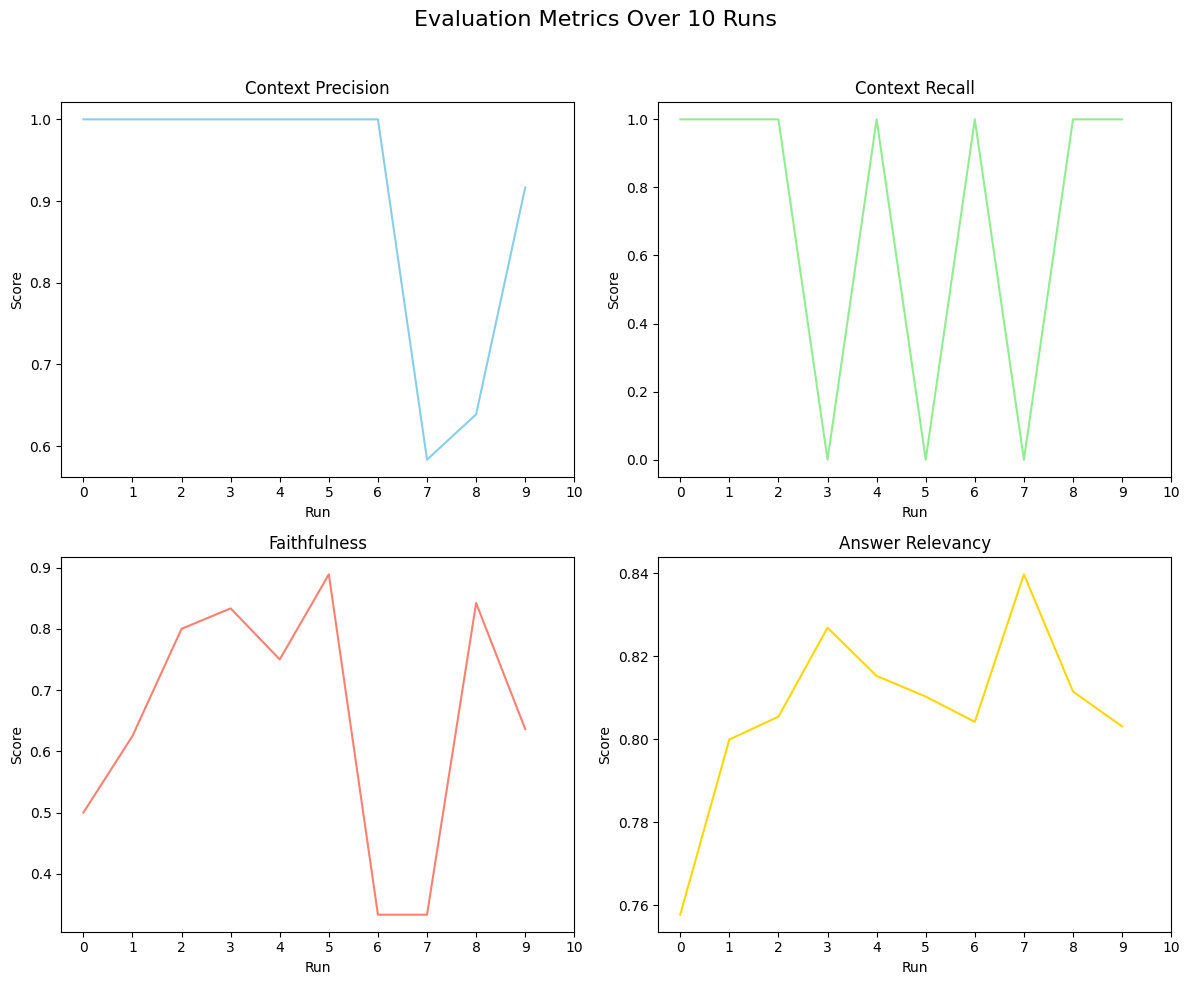

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# # 創建一個 DataFrame
# df = pd.DataFrame(data)

# 創建視覺化，顯示每個特性的分數變化
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Evaluation Metrics Over 10 Runs", fontsize=16)
# 設置 x 軸為 1 到 10
x_range = range(0, 11)
# y_range = range(1, 11)
# 繪製每個特性的折線圖
df["context_precision"].plot(ax=axes[0, 0], title="Context Precision", color="skyblue",xticks=x_range)
df["context_recall"].plot(ax=axes[0, 1], title="Context Recall", color="lightgreen",xticks=x_range)
df["faithfulness"].plot(ax=axes[1, 0], title="Faithfulness", color="salmon",xticks=x_range)
df["answer_relevancy"].plot(ax=axes[1, 1], title="Answer Relevancy", color="gold",xticks=x_range)

# 設置標籤
for ax in axes.flat:
    ax.set_xlabel("Run")
    ax.set_ylabel("Score")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



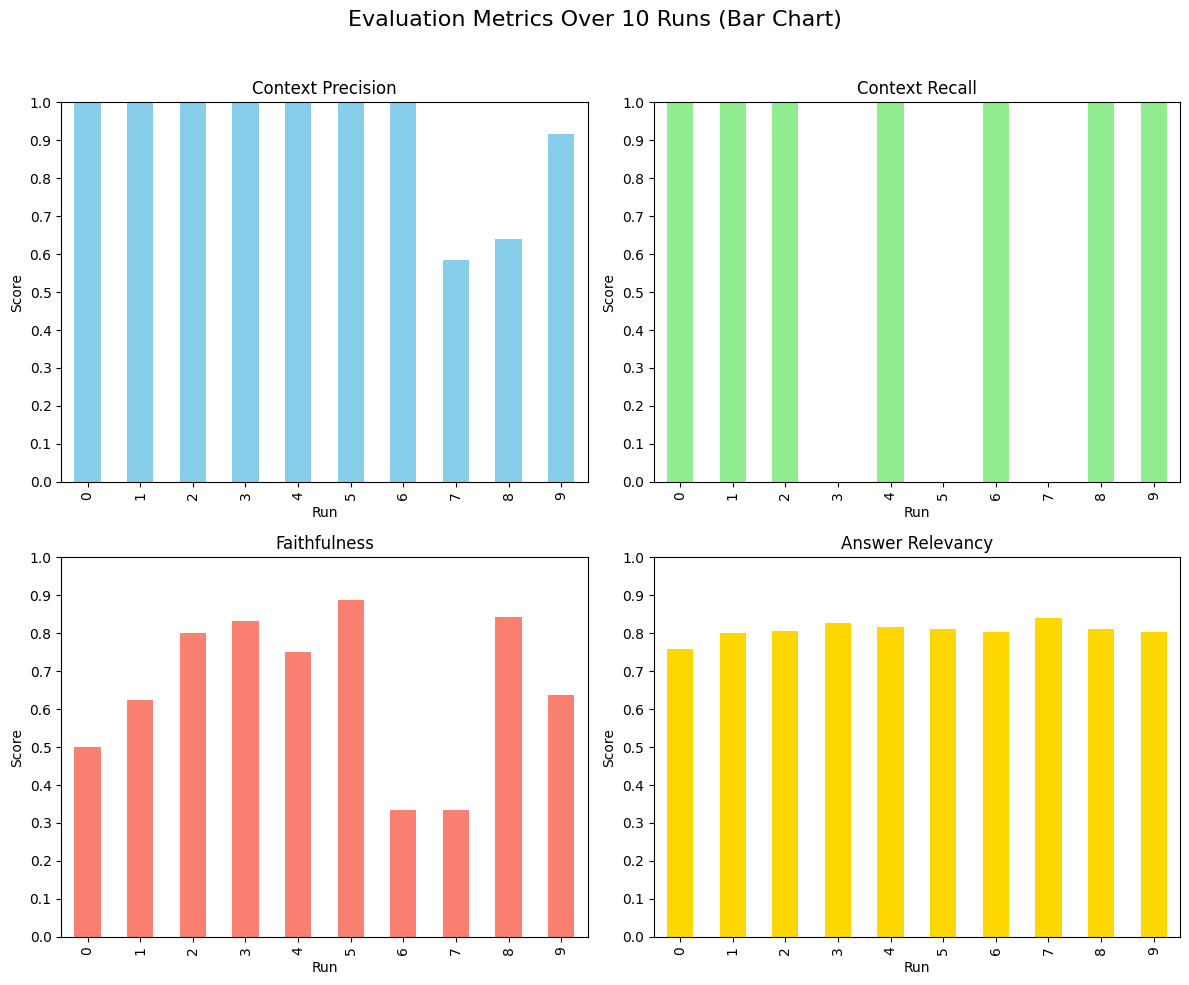

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# # 生成範例數據，假設有10次評估結果
# data = {
#     "context_precision": np.random.rand(10),
#     "context_recall": np.random.rand(10),
#     "faithfulness": np.random.rand(10),
#     "answer_relevancy": np.random.rand(10),
# }

# # 創建一個 DataFrame
# df = pd.DataFrame(data)

# 創建視覺化，顯示每個特性的分數變化
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Evaluation Metrics Over 10 Runs (Bar Chart)", fontsize=16)

# 設置 x 軸為 1 到 10
x_range = range(1, 11)

# 設置 y 軸的刻度範圍 0.0 到 1.0 並顯示 0.1 的間隔
y_ticks = np.arange(0.0, 1.1, 0.1)

# 繪製每個特性的長條圖，並設置 y 軸範圍和刻度
df["context_precision"].plot(kind="bar", ax=axes[0, 0], title="Context Precision", color="skyblue")
axes[0, 0].set_ylim(0.0, 1.0)
axes[0, 0].set_yticks(y_ticks)

df["context_recall"].plot(kind="bar", ax=axes[0, 1], title="Context Recall", color="lightgreen")
axes[0, 1].set_ylim(0.0, 1.0)
axes[0, 1].set_yticks(y_ticks)

df["faithfulness"].plot(kind="bar", ax=axes[1, 0], title="Faithfulness", color="salmon")
axes[1, 0].set_ylim(0.0, 1.0)
axes[1, 0].set_yticks(y_ticks)

df["answer_relevancy"].plot(kind="bar", ax=axes[1, 1], title="Answer Relevancy", color="gold")
axes[1, 1].set_ylim(0.0, 1.0)
axes[1, 1].set_yticks(y_ticks)

# 設置標籤
for ax in axes.flat:
    ax.set_xlabel("Run")
    ax.set_ylabel("Score")
    ax.set_xticks(np.arange(0, 10))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [17]:
# 假設 df 是你已經生成的 DataFrame

# 提取第一次問答的數據
first_run = df.iloc[0]  # 提取 DataFrame 的第一行

# 分別獲取第一次問答的 context_precision, context_recall, faithfulness, answer_relevancy
context_precision = first_run["context_precision"]
context_recall = first_run["context_recall"]
faithfulness = first_run["faithfulness"]
answer_relevancy = first_run["answer_relevancy"]

# 打印結果
print("First Run Results:")
print(f"Context Precision: {context_precision}")
print(f"Context Recall: {context_recall}")
print(f"Faithfulness: {faithfulness}")
print(f"Answer Relevancy: {answer_relevancy}")


First Run Results:
Context Precision: 0.999999999975
Context Recall: 1.0
Faithfulness: 0.5
Answer Relevancy: 0.7576717130911176


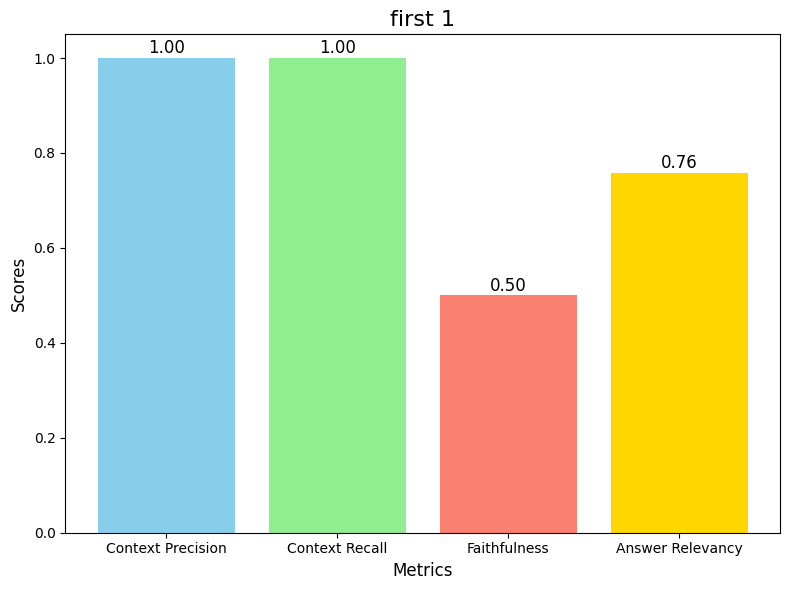

In [18]:
# 提取第一次問答的數據並進行可視化
first_run = df.iloc[0]  # 提取 DataFrame 的第一行

# 分別獲取第一次問答的 context_precision, context_recall, faithfulness, answer_relevancy
context_precision = first_run["context_precision"]
context_recall = first_run["context_recall"]
faithfulness = first_run["faithfulness"]
answer_relevancy = first_run["answer_relevancy"]

# 將數據轉換為列表進行可視化
metrics = ["Context Precision", "Context Recall", "Faithfulness", "Answer Relevancy"]
scores = [context_precision, context_recall, faithfulness, answer_relevancy]

# 創建條形圖
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=["skyblue", "lightgreen", "salmon", "gold"])

# 添加標題和標籤
plt.title("first 1", fontsize=16)
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Scores", fontsize=12)

# 顯示每個條形圖上的分數
for i, v in enumerate(scores):
    plt.text(i, v + 0.01, f"{v:.2f}", ha="center", fontsize=12)

# 顯示圖表
plt.tight_layout()
plt.show()


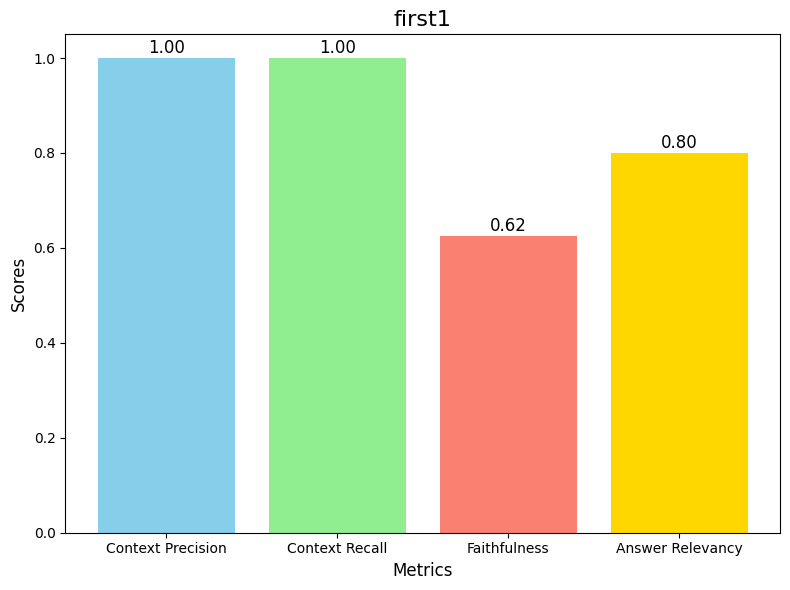

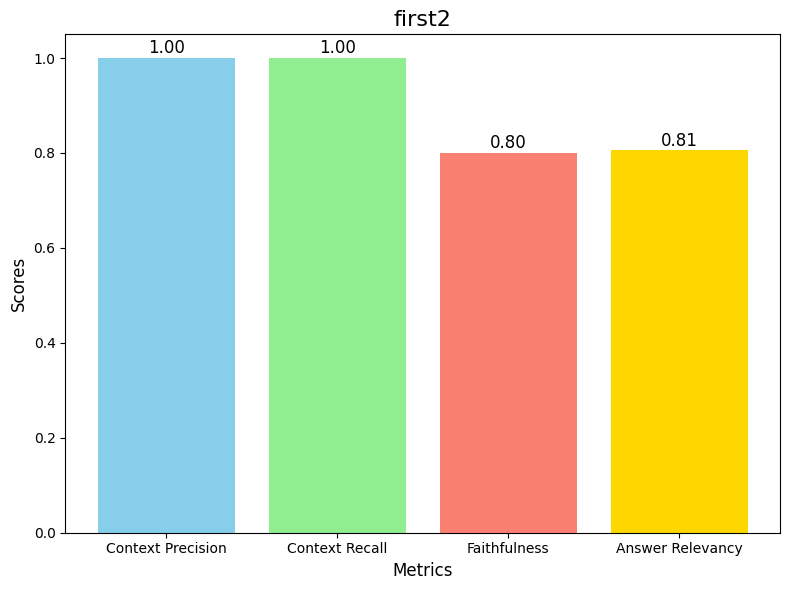

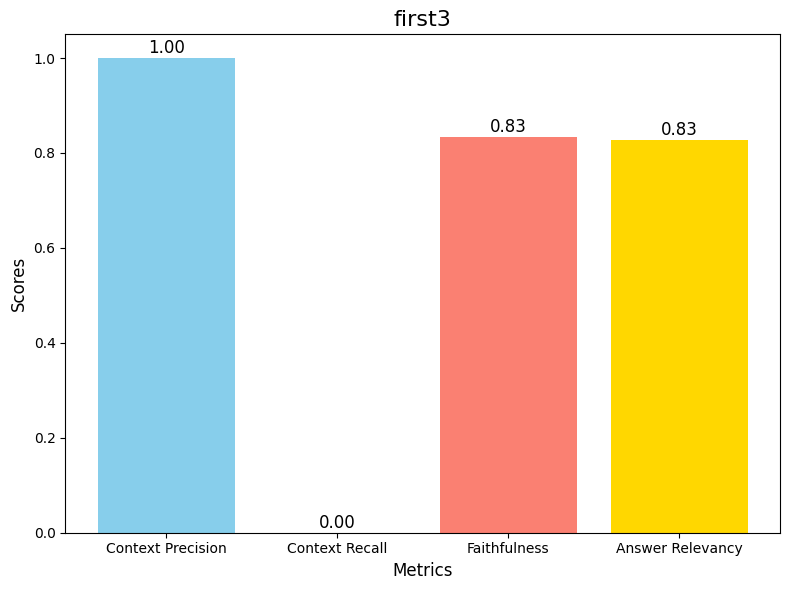

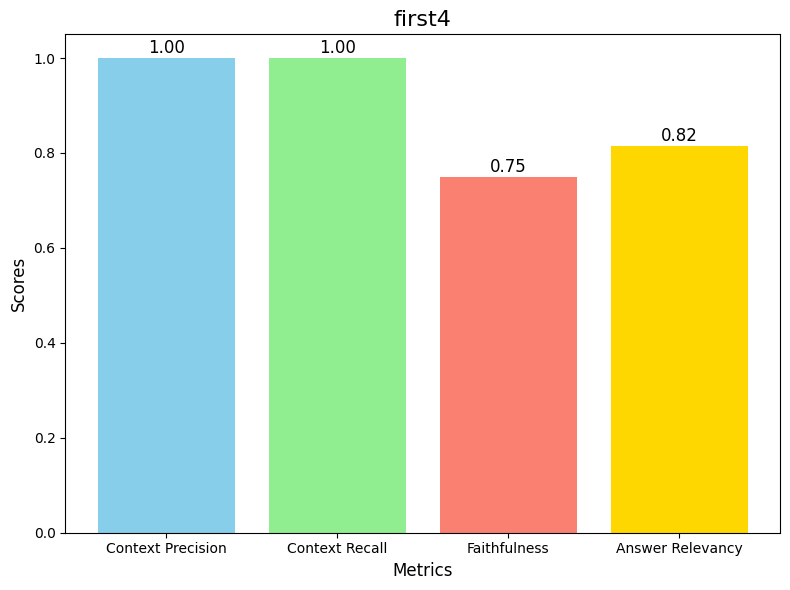

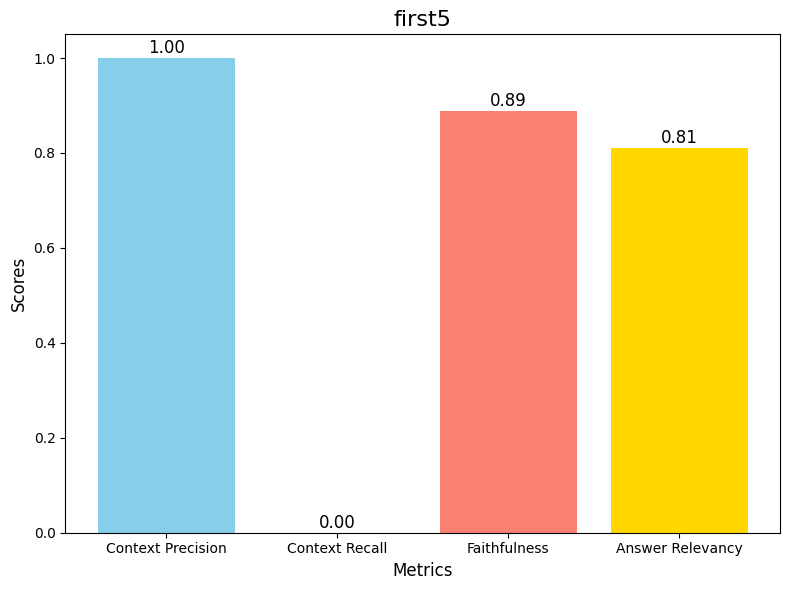

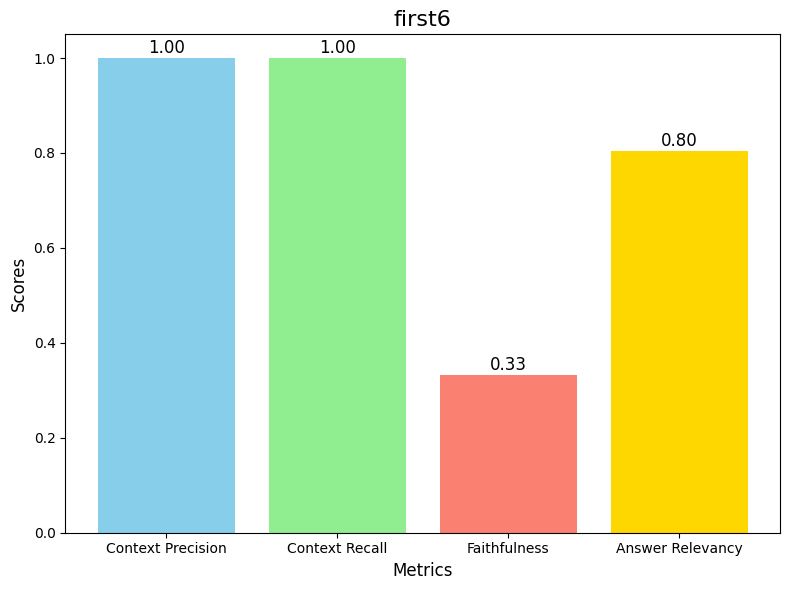

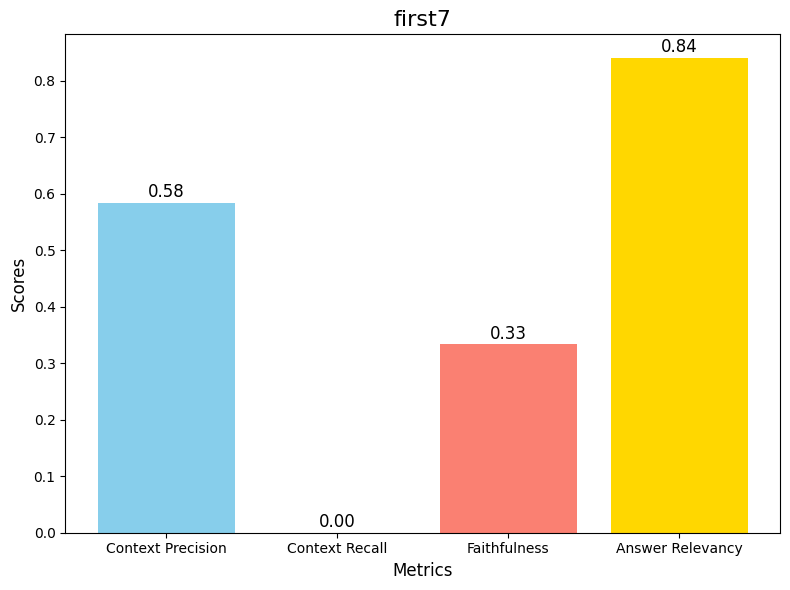

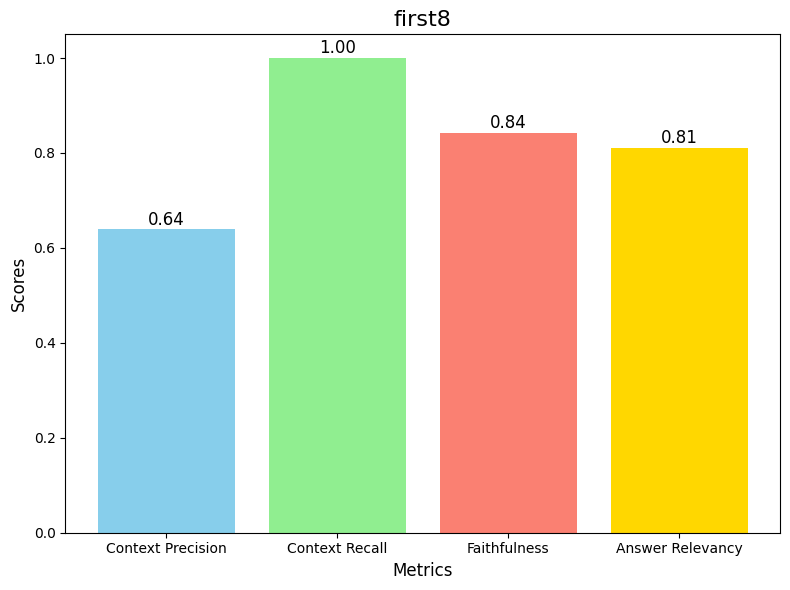

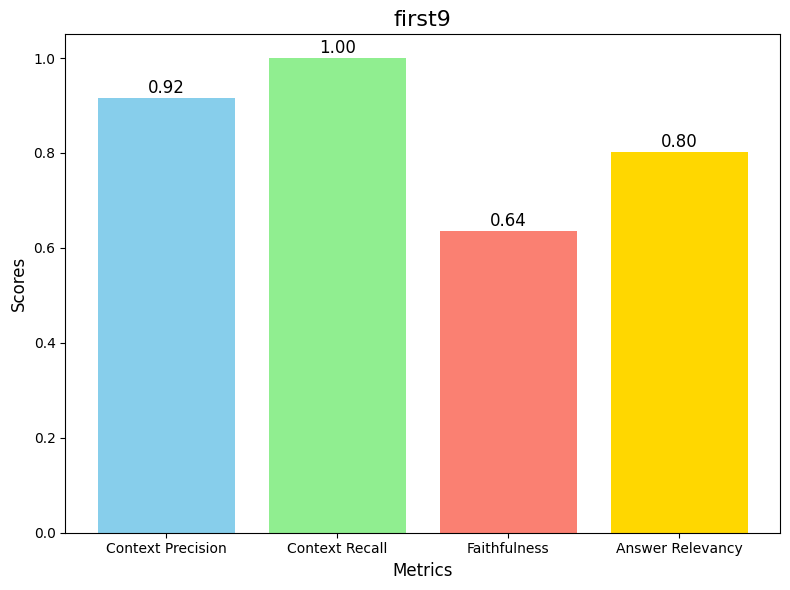

In [19]:
for i in range(1,10):
        # 提取第一次問答的數據並進行可視化
    first_run = df.iloc[i]  # 提取 DataFrame 的第一行

    # 分別獲取第一次問答的 context_precision, context_recall, faithfulness, answer_relevancy
    context_precision = first_run["context_precision"]
    context_recall = first_run["context_recall"]
    faithfulness = first_run["faithfulness"]
    answer_relevancy = first_run["answer_relevancy"]

    # 將數據轉換為列表進行可視化
    metrics = ["Context Precision", "Context Recall", "Faithfulness", "Answer Relevancy"]
    scores = [context_precision, context_recall, faithfulness, answer_relevancy]

    # 創建條形圖
    plt.figure(figsize=(8, 6))
    plt.bar(metrics, scores, color=["skyblue", "lightgreen", "salmon", "gold"])

    # 添加標題和標籤
    plt.title(f"first{i}", fontsize=16)
    plt.xlabel("Metrics", fontsize=12)
    plt.ylabel("Scores", fontsize=12)

    # 顯示每個條形圖上的分數
    for i, v in enumerate(scores):
        plt.text(i, v + 0.01, f"{v:.2f}", ha="center", fontsize=12)

    # 顯示圖表
    plt.tight_layout()
    plt.show()


In [20]:
json_output = df.to_json(orient='records', force_ascii=False)
print(json_output)

[{"user_input":"為預防消費糾紛,保護消費者權益,中央主管機關得選擇特定行業,擬訂其定型化契約應記載或不得記載事項,報請行政院核定後公告,下列敘述何者錯誤?(A)公告不得記載之事項,經記載於定型化契約,仍構成契約之內容(B)違反公告之定型化契約,其定型化契約條款無效(C)公告應記載之事項,雖未記載於定型化契約,仍構成契約之內容(D)企業經營者使用定型化契約者,主管機關得隨時派員查核","retrieved_contexts":["中央主管機關為預防消費糾紛，保護消費者權益，促進定型化契約之公平化，得選擇特定行業，擬訂其定\n\n型化契約應記載或不得記載事項，報請行政院核定後公告之。\n\n前項應記載事項，依契約之性質及目的，其內容得包括：\n\n一、契約之重要權利義務事項。\n\n二、違反契約之法律效果。\n\n三、預付型交易之履約擔保。\n\n四、契約之解除權、終止權及其法律效果。\n\n五、其他與契約履行有關之事項。\n\n第一項不得記載事項，依契約之性質及目的，其內容得包括：\n\n一、企業經營者保留契約內容或期限之變更權或解釋權。\n\nhttps:\/\/www.ey.gov.tw\/Page\/4FF303AE95592945\/f65a641d-d096-48c1-b357-435ac7786e72\n\n4\/13\n\n2024\/8\/25 下午3:18\n\n消費者保護法 (行政院全球資訊網-主管法規)\n\n二、限制或免除企業經營者之義務或責任。\n\n三、限制或剝奪消費者行使權利，加重消費者之義務或責任。\n\n四、其他對消費者顯失公平事項。\n\n違反第一項公告之定型化契約，其定型化契約條款無效。該定型化契約之效力，依前條規定定之。\n\n中央主管機關公告應記載之事項，雖未記載於定型化契約，仍構成契約之內容。\n\n企業經營者使用定型化契約者，主管機關得隨時派員查核。\n\n第十七條之一（企業經營者符合規定之舉證責任）","一、違反平等互惠原則者。\n\n二、條款與其所排除不予適用之任意規定之立法意旨顯相矛盾者。\n\n三、契約之主要權利或義務，因受條款之限制，致契約之目的難以達成者。\n\n第十三條（定型化契約條款之明示）\n\n企業經營者應向消費者明示定型化契約條款之內容；明示其內容顯有困難者，應以顯著之方式，公告其內\

In [21]:
df.to_json('output.json', orient='records', force_ascii=False)

print("JSON 檔案已成功儲存！")

JSON 檔案已成功儲存！


In [22]:
df.to_json('output.json', orient='columns', force_ascii=False)

print("JSON 檔案已成功儲存！")

JSON 檔案已成功儲存！


In [23]:
import os
from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    context_recall,
    context_precision,
    # context_entity_recall,
    # answer_correctness,
    answer_similarity

)

 
result = evaluate(
    dataset = dataset, 
    metrics=[
        context_precision,
        context_recall,
        faithfulness,
        answer_relevancy,    
        # context_entity_recall,
        # answer_correctness,
        answer_similarity
    ],
)

Evaluating:   0%|          | 0/50 [00:00<?, ?it/s]

D:\RAGAS\ragas\src\ragas\metrics\base.py:281: DeprecationWarning: The function _single_turn_ascore was deprecated in 0.2, and will be removed in the 0.3 release. Use LLMContextRecall instead.
  self._single_turn_ascore(sample=sample, callbacks=group_cm),
D:\RAGAS\ragas\src\ragas\metrics\base.py:281: DeprecationWarning: The function _single_turn_ascore was deprecated in 0.2, and will be removed in the 0.3 release. Use LLMContextRecall instead.
  self._single_turn_ascore(sample=sample, callbacks=group_cm),
D:\RAGAS\ragas\src\ragas\metrics\base.py:281: DeprecationWarning: The function _single_turn_ascore was deprecated in 0.2, and will be removed in the 0.3 release. Use LLMContextRecall instead.
  self._single_turn_ascore(sample=sample, callbacks=group_cm),
D:\RAGAS\ragas\src\ragas\metrics\_context_recall.py:187: DeprecationWarning: The function _ascore was deprecated in 0.2, and will be removed in the 0.3 release. Use LLMContextRecall instead.
  return await self._ascore(row, callbacks)


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

 
df = result.to_pandas()
df

,user_input,retrieved_contexts,response,reference,context_precision,context_recall,faithfulness,answer_relevancy,semantic_similarity
0,"為預防消費糾紛,保護消費者權益,中央主管機關得選擇特定行業,擬訂其定型化契約應記載或不得記載...",[中央主管機關為預防消費糾紛，保護消費者權益，促進定型化契約之公平化，得選擇特定行業，擬訂其...,在針對消費者權益保護及消費糾紛預防的相關問題中，對於選項的正確性分析如下：\n ...,"公告不得記載之事項,經記載於定型化契約",1.000000,0.0,0.500000,0.757672,0.840011
1,"依消費者保護法規定,下列關於企業經營者提供商品之敘述,何者正確?(A)對於有危害消費者財產之...",[Q:028.企業經營者依消費者保護法第七條第三項規定對消費者或第三人之損害賠償責任，得否預...,\n 根據消費者保護法的相關規定，以下是對於企業經營者提供商品的正確敘述分析：...,"對於有事實足認有危害消費者安全與健康之虞的商品,應即回收",1.000000,1.0,0.666667,0.799911,0.877089
2,"依消費者保護法規定,企業經營者以定型化契約條款使消費者拋棄消費者審閱之合理期間,其契約條款之...",[（三）違反合理審閱期間之效力：企業經營者如違反有關合理審閱期間之規定者，由於影響消費者無法...,\n 根據消費者保護法的相關規定，企業經營者若以定型化契約條款使消費者放棄合理...,其條款不構成契約之內容,1.000000,1.0,0.800000,0.805421,0.872044
3,"依消費者保護法規定,下列有關消費者保護團體之敘述,何者錯誤?(A)消費者保護團體以社團法人或...",[輸入之商品或服務在原產地附有警告標示者，準用前項之規定。\n\n第二十五條（書面保證書及其...,\n 根據消費者保護法的規定，消費者保護團體的主要任務是保護消費者權益和推行消...,以確保公平競爭、促進經濟之安定與繁榮為宗旨,1.000000,0.0,0.900000,0.826870,0.826607
4,"依消費者保護法規定關於商品標示,下列敘述何者錯誤?(A)企業經營者應依商品標示法等法令為商品...",[企業經營者應確保廣告內容之真實，其對消費者所負之義務不得低於廣告之內容。\n\n企業經營者...,\n 根據消費者保護法的規定，對於商品標示的要求，以下是各項敘述的正確性分析：...,"輸入之商品,所附中文標示及說明書,其內容得就原產地之標示及說明,簡略摘要之",1.000000,1.0,0.750000,0.815238,0.848334
5,"依消費者保護法規定,企業經營者所出具之書面保證書其應載明事項,下列何者錯誤?(A)交易日期(...",[（三）廣告代理業：依照公平交易法第二十一條第四項規定，廣告代理業在明知或可得知的情況下，仍...,\n 根據消費者保護法的規定，企業經營者所出具的書面保證書必須包含特定的資訊，...,製造商之資本額,1.000000,0.0,1.000000,0.810273,0.841222
6,"依消費者保護法規定,下列有關消費者保護團體從事檢驗之敘述,何者錯誤?(A)得委託設有與檢驗項...",[法及經過，並通知相關企業經營者。\n\n消費者保護團體發表第二項檢驗結果有錯誤時，應主動對...,\n 根據消費者保護法的規定，對於消費者保護團體從事檢驗的相關敘述，選項(C)...,"發表檢驗結果後,通知相關企業經營者,得不公布其檢驗方法及經過",1.000000,1.0,0.500000,0.804175,0.824047
7,"依消費者保護法規定,有關消費關係之定義,下列敘述何者正確?(A)指消費者與消費者間就商品所發...",[Q:014.何謂消費者？\n\nA:所謂消費者，依照消費者保護法第二條第一款的規定，是指以...,\n 根據消費者保護法的規定，消費關係的正確定義是指消費者與企業經營者間就商品...,指企業經營者與企業經營者間就商品所發生之法律關係,0.333333,0.0,0.333333,0.843032,0.875837
8,"依消費者保護法規定,下列關於定型化契約條款之敘述,何者錯誤?(A)定型化契約條款未經記載於定...",[（一）定型化契約之條款原則上企業經營者應向消費者明示。\n\n（二）企業經營者明示其內容顯...,\n 根據消費者保護法的規定，對於定型化契約條款的敘述中，以下幾點可作為分析：...,"定型化契約中之定型化契約條款,一部無效,該契約全部無效",0.638889,1.0,0.842105,0.811481,0.887052
9,"依消費者保護法規定,提供之商品或服務具有危害消費者健康、財產之可能者,下列何者應於明顯處為警...",[五、必要時，得就地抽樣商品，加以檢驗。\n\n第三十四條（可為證據之物之扣押）\n\n直轄...,\n 根據消費者保護法的規定，企業經營者（A）應於明顯處為警告標示及緊急處理危...,企業經營者,1.000000,1.0,0.727273,0.803067,0.800643


In [25]:
import os
from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    context_recall,
    context_precision,
    context_entity_recall,
    # answer_correctness,
    answer_similarity

)

 
result = evaluate(
    dataset = dataset, 
    metrics=[
        context_precision,
        context_recall,
        faithfulness,
        answer_relevancy,    
        context_entity_recall,
        # answer_correctness,
        answer_similarity
    ],
)

Evaluating:   0%|          | 0/60 [00:00<?, ?it/s]

D:\RAGAS\ragas\src\ragas\metrics\base.py:281: DeprecationWarning: The function _single_turn_ascore was deprecated in 0.2, and will be removed in the 0.3 release. Use LLMContextRecall instead.
  self._single_turn_ascore(sample=sample, callbacks=group_cm),
D:\RAGAS\ragas\src\ragas\metrics\base.py:281: DeprecationWarning: The function _single_turn_ascore was deprecated in 0.2, and will be removed in the 0.3 release. Use LLMContextRecall instead.
  self._single_turn_ascore(sample=sample, callbacks=group_cm),
D:\RAGAS\ragas\src\ragas\metrics\base.py:281: DeprecationWarning: The function _single_turn_ascore was deprecated in 0.2, and will be removed in the 0.3 release. Use LLMContextRecall instead.
  self._single_turn_ascore(sample=sample, callbacks=group_cm),
D:\RAGAS\ragas\src\ragas\metrics\_context_recall.py:187: DeprecationWarning: The function _ascore was deprecated in 0.2, and will be removed in the 0.3 release. Use LLMContextRecall instead.
  return await self._ascore(row, callbacks)


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

 
df = result.to_pandas()
df

,user_input,retrieved_contexts,response,reference,context_precision,context_recall,faithfulness,answer_relevancy,context_entity_recall,semantic_similarity
0,"為預防消費糾紛,保護消費者權益,中央主管機關得選擇特定行業,擬訂其定型化契約應記載或不得記載...",[中央主管機關為預防消費糾紛，保護消費者權益，促進定型化契約之公平化，得選擇特定行業，擬訂其...,在針對消費者權益保護及消費糾紛預防的相關問題中，對於選項的正確性分析如下：\n ...,"公告不得記載之事項,經記載於定型化契約",1.000000,1.0,0.500000,0.757672,0.500000,0.840011
1,"依消費者保護法規定,下列關於企業經營者提供商品之敘述,何者正確?(A)對於有危害消費者財產之...",[Q:028.企業經營者依消費者保護法第七條第三項規定對消費者或第三人之損害賠償責任，得否預...,\n 根據消費者保護法的相關規定，以下是對於企業經營者提供商品的正確敘述分析：...,"對於有事實足認有危害消費者安全與健康之虞的商品,應即回收",1.000000,1.0,0.625000,0.799911,0.000000,0.877089
2,"依消費者保護法規定,企業經營者以定型化契約條款使消費者拋棄消費者審閱之合理期間,其契約條款之...",[（三）違反合理審閱期間之效力：企業經營者如違反有關合理審閱期間之規定者，由於影響消費者無法...,\n 根據消費者保護法的相關規定，企業經營者若以定型化契約條款使消費者放棄合理...,其條款不構成契約之內容,1.000000,1.0,0.800000,0.805421,1.000000,0.872123
3,"依消費者保護法規定,下列有關消費者保護團體之敘述,何者錯誤?(A)消費者保護團體以社團法人或...",[輸入之商品或服務在原產地附有警告標示者，準用前項之規定。\n\n第二十五條（書面保證書及其...,\n 根據消費者保護法的規定，消費者保護團體的主要任務是保護消費者權益和推行消...,以確保公平競爭、促進經濟之安定與繁榮為宗旨,1.000000,0.0,0.800000,0.826870,0.000000,0.826607
4,"依消費者保護法規定關於商品標示,下列敘述何者錯誤?(A)企業經營者應依商品標示法等法令為商品...",[企業經營者應確保廣告內容之真實，其對消費者所負之義務不得低於廣告之內容。\n\n企業經營者...,\n 根據消費者保護法的規定，對於商品標示的要求，以下是各項敘述的正確性分析：...,"輸入之商品,所附中文標示及說明書,其內容得就原產地之標示及說明,簡略摘要之",1.000000,1.0,0.750000,0.815238,0.000000,0.848334
5,"依消費者保護法規定,企業經營者所出具之書面保證書其應載明事項,下列何者錯誤?(A)交易日期(...",[（三）廣告代理業：依照公平交易法第二十一條第四項規定，廣告代理業在明知或可得知的情況下，仍...,\n 根據消費者保護法的規定，企業經營者所出具的書面保證書必須包含特定的資訊，...,製造商之資本額,1.000000,0.0,0.888889,0.810273,0.000000,0.841222
6,"依消費者保護法規定,下列有關消費者保護團體從事檢驗之敘述,何者錯誤?(A)得委託設有與檢驗項...",[法及經過，並通知相關企業經營者。\n\n消費者保護團體發表第二項檢驗結果有錯誤時，應主動對...,\n 根據消費者保護法的規定，對於消費者保護團體從事檢驗的相關敘述，選項(C)...,"發表檢驗結果後,通知相關企業經營者,得不公布其檢驗方法及經過",1.000000,1.0,0.666667,0.807900,0.333333,0.823846
7,"依消費者保護法規定,有關消費關係之定義,下列敘述何者正確?(A)指消費者與消費者間就商品所發...",[Q:014.何謂消費者？\n\nA:所謂消費者，依照消費者保護法第二條第一款的規定，是指以...,\n 根據消費者保護法的規定，消費關係的正確定義是指消費者與企業經營者間就商品...,指企業經營者與企業經營者間就商品所發生之法律關係,0.333333,0.0,0.333333,0.849619,0.666667,0.875837
8,"依消費者保護法規定,下列關於定型化契約條款之敘述,何者錯誤?(A)定型化契約條款未經記載於定...",[（一）定型化契約之條款原則上企業經營者應向消費者明示。\n\n（二）企業經營者明示其內容顯...,\n 根據消費者保護法的規定，對於定型化契約條款的敘述中，以下幾點可作為分析：...,"定型化契約中之定型化契約條款,一部無效,該契約全部無效",1.000000,1.0,0.842105,0.811481,0.500000,0.887052
9,"依消費者保護法規定,提供之商品或服務具有危害消費者健康、財產之可能者,下列何者應於明顯處為警...",[五、必要時，得就地抽樣商品，加以檢驗。\n\n第三十四條（可為證據之物之扣押）\n\n直轄...,\n 根據消費者保護法的規定，企業經營者（A）應於明顯處為警告標示及緊急處理危...,企業經營者,0.916667,1.0,0.636364,0.803067,1.000000,0.800643


In [27]:
df.to_json('output.json', orient='records', force_ascii=False)

print("JSON 檔案已成功儲存！")

JSON 檔案已成功儲存！


In [28]:
df.to_json('output.json', orient='records', force_ascii=False)

print("JSON 檔案已成功儲存！")

JSON 檔案已成功儲存！


In [29]:
df = pd.DataFrame(data)

# 將 DataFrame 輸出為 Excel 檔案
df.to_excel('output.xlsx', index=False)

print("Excel 檔案已成功儲存！")

Excel 檔案已成功儲存！


In [30]:
df = result.to_pandas()
df

,user_input,retrieved_contexts,response,reference,context_precision,context_recall,faithfulness,answer_relevancy,context_entity_recall,semantic_similarity
0,"為預防消費糾紛,保護消費者權益,中央主管機關得選擇特定行業,擬訂其定型化契約應記載或不得記載...",[中央主管機關為預防消費糾紛，保護消費者權益，促進定型化契約之公平化，得選擇特定行業，擬訂其...,在針對消費者權益保護及消費糾紛預防的相關問題中，對於選項的正確性分析如下：\n ...,"公告不得記載之事項,經記載於定型化契約",1.000000,1.0,0.500000,0.757672,0.500000,0.840011
1,"依消費者保護法規定,下列關於企業經營者提供商品之敘述,何者正確?(A)對於有危害消費者財產之...",[Q:028.企業經營者依消費者保護法第七條第三項規定對消費者或第三人之損害賠償責任，得否預...,\n 根據消費者保護法的相關規定，以下是對於企業經營者提供商品的正確敘述分析：...,"對於有事實足認有危害消費者安全與健康之虞的商品,應即回收",1.000000,1.0,0.625000,0.799911,0.000000,0.877089
2,"依消費者保護法規定,企業經營者以定型化契約條款使消費者拋棄消費者審閱之合理期間,其契約條款之...",[（三）違反合理審閱期間之效力：企業經營者如違反有關合理審閱期間之規定者，由於影響消費者無法...,\n 根據消費者保護法的相關規定，企業經營者若以定型化契約條款使消費者放棄合理...,其條款不構成契約之內容,1.000000,1.0,0.800000,0.805421,1.000000,0.872123
3,"依消費者保護法規定,下列有關消費者保護團體之敘述,何者錯誤?(A)消費者保護團體以社團法人或...",[輸入之商品或服務在原產地附有警告標示者，準用前項之規定。\n\n第二十五條（書面保證書及其...,\n 根據消費者保護法的規定，消費者保護團體的主要任務是保護消費者權益和推行消...,以確保公平競爭、促進經濟之安定與繁榮為宗旨,1.000000,0.0,0.800000,0.826870,0.000000,0.826607
4,"依消費者保護法規定關於商品標示,下列敘述何者錯誤?(A)企業經營者應依商品標示法等法令為商品...",[企業經營者應確保廣告內容之真實，其對消費者所負之義務不得低於廣告之內容。\n\n企業經營者...,\n 根據消費者保護法的規定，對於商品標示的要求，以下是各項敘述的正確性分析：...,"輸入之商品,所附中文標示及說明書,其內容得就原產地之標示及說明,簡略摘要之",1.000000,1.0,0.750000,0.815238,0.000000,0.848334
5,"依消費者保護法規定,企業經營者所出具之書面保證書其應載明事項,下列何者錯誤?(A)交易日期(...",[（三）廣告代理業：依照公平交易法第二十一條第四項規定，廣告代理業在明知或可得知的情況下，仍...,\n 根據消費者保護法的規定，企業經營者所出具的書面保證書必須包含特定的資訊，...,製造商之資本額,1.000000,0.0,0.888889,0.810273,0.000000,0.841222
6,"依消費者保護法規定,下列有關消費者保護團體從事檢驗之敘述,何者錯誤?(A)得委託設有與檢驗項...",[法及經過，並通知相關企業經營者。\n\n消費者保護團體發表第二項檢驗結果有錯誤時，應主動對...,\n 根據消費者保護法的規定，對於消費者保護團體從事檢驗的相關敘述，選項(C)...,"發表檢驗結果後,通知相關企業經營者,得不公布其檢驗方法及經過",1.000000,1.0,0.666667,0.807900,0.333333,0.823846
7,"依消費者保護法規定,有關消費關係之定義,下列敘述何者正確?(A)指消費者與消費者間就商品所發...",[Q:014.何謂消費者？\n\nA:所謂消費者，依照消費者保護法第二條第一款的規定，是指以...,\n 根據消費者保護法的規定，消費關係的正確定義是指消費者與企業經營者間就商品...,指企業經營者與企業經營者間就商品所發生之法律關係,0.333333,0.0,0.333333,0.849619,0.666667,0.875837
8,"依消費者保護法規定,下列關於定型化契約條款之敘述,何者錯誤?(A)定型化契約條款未經記載於定...",[（一）定型化契約之條款原則上企業經營者應向消費者明示。\n\n（二）企業經營者明示其內容顯...,\n 根據消費者保護法的規定，對於定型化契約條款的敘述中，以下幾點可作為分析：...,"定型化契約中之定型化契約條款,一部無效,該契約全部無效",1.000000,1.0,0.842105,0.811481,0.500000,0.887052
9,"依消費者保護法規定,提供之商品或服務具有危害消費者健康、財產之可能者,下列何者應於明顯處為警...",[五、必要時，得就地抽樣商品，加以檢驗。\n\n第三十四條（可為證據之物之扣押）\n\n直轄...,\n 根據消費者保護法的規定，企業經營者（A）應於明顯處為警告標示及緊急處理危...,企業經營者,0.916667,1.0,0.636364,0.803067,1.000000,0.800643


In [31]:
df.to_excel('out.xlsx', index=False)

print("Excel 檔案已成功儲存！")

Excel 檔案已成功儲存！


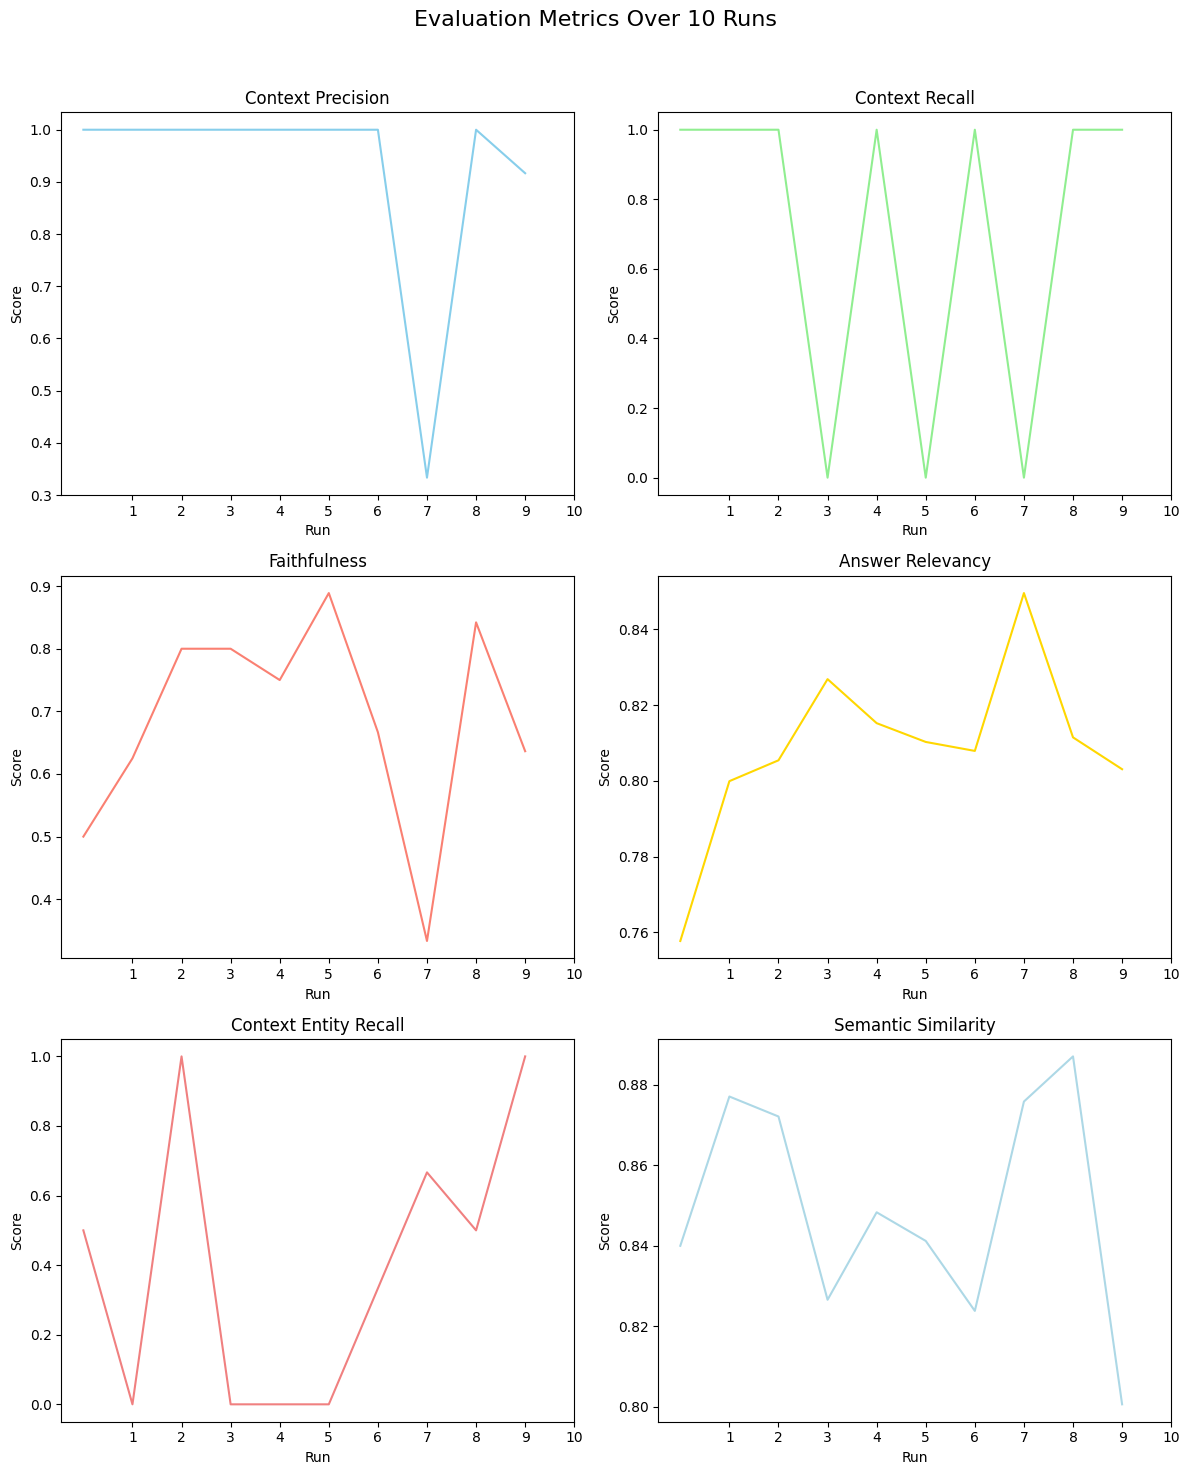

In [32]:
import matplotlib.pyplot as plt


# 創建 3x2 的子圖佈局
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
fig.suptitle("Evaluation Metrics Over 10 Runs", fontsize=16)

# 設置 x 軸範圍為 1 到 10
x_range = range(1, 11)

# 繪製每個特性的折線圖
df["context_precision"].plot(ax=axes[0, 0], title="Context Precision", color="skyblue", xticks=x_range)
df["context_recall"].plot(ax=axes[0, 1], title="Context Recall", color="lightgreen", xticks=x_range)
df["faithfulness"].plot(ax=axes[1, 0], title="Faithfulness", color="salmon", xticks=x_range)
df["answer_relevancy"].plot(ax=axes[1, 1], title="Answer Relevancy", color="gold", xticks=x_range)
df["context_entity_recall"].plot(ax=axes[2, 0], title="Context Entity Recall", color="lightcoral", xticks=x_range)
df["semantic_similarity"].plot(ax=axes[2, 1], title="Semantic Similarity", color="lightblue", xticks=x_range)

# 設置標籤
for ax in axes.flat:
    ax.set_xlabel("Run")
    ax.set_ylabel("Score")

# 調整佈局，使圖表不會重疊
plt.tight_layout(rect=[0, 0, 1, 0.96])

# 顯示圖表
plt.show()
